# Digits Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Loading the Data (Digits Dataset)

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

Now that you have the dataset loaded you can use the commands below

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Showing the Images and Labels (Digits Dataset)

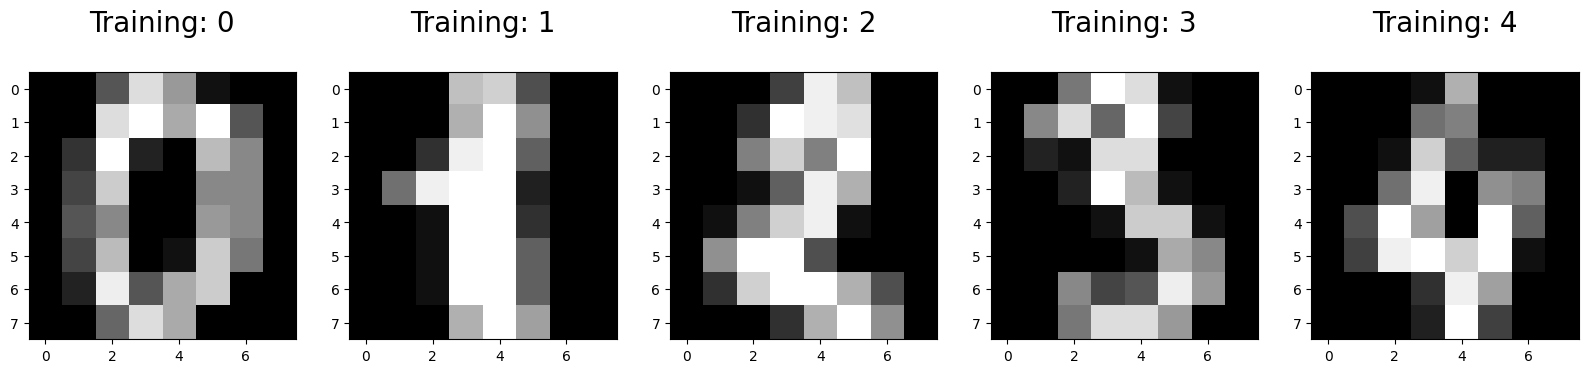

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8712358)

In [10]:
# Prepare lebels for binary prediction: whether the written digit is 5 or not.
# Prediction will be 1 if the digit, and the prediction will be 0 if it is not 5
target_digit = 5  # Replace with your desired target digit

y_train_binary = (y_train == target_digit).astype(int)
y_test_binary = (y_test == target_digit).astype(int)

In [12]:
# Display binary target
mm = 30
print(y_train_binary[0:mm])

# Display actual targets
print(y_train[0:mm])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[7 0 6 3 9 2 7 2 3 3 0 9 3 3 6 6 8 4 1 5 5 2 7 2 9 8 0 3 8 1]


### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [13]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [14]:
logisticRegr = LogisticRegression()

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

## Binary Classifier (5 or not 5)

In [53]:
model1 = LogisticRegression(random_state=123234)
logit_binary = model1.fit(x_train, y_train_binary)

In [54]:
# Preict one observation
logit_binary.predict(x_test[0].reshape(1,-1))

array([0])

In [37]:
# Predict multiple observations (images) at once. Here, we consider the first 5 obsevration
predictions5_binary = logit_binary.predict(x_test[0:5])

In [38]:
# Show the first five predictions
predictions5_binary[0:5]

array([0, 0, 1, 0, 0])

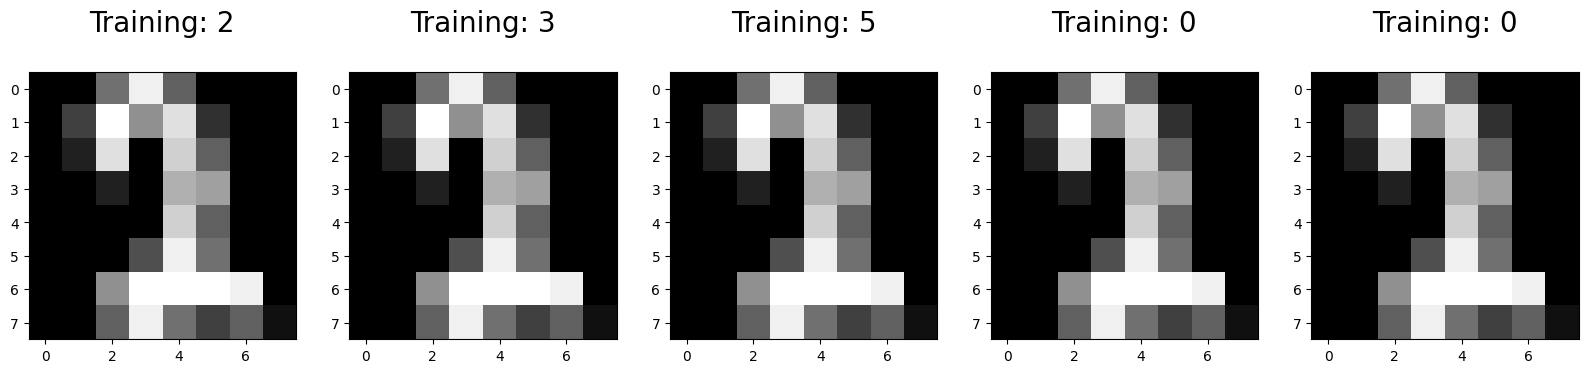

In [39]:
# displaty the first five images in the test set
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [55]:
# Predict all observation in the test set
predictions_binary = logit_binary.predict(x_test)

## Predicting actual labels (actual digit)

In [56]:
model2 = LogisticRegression(random_state=9823764)
logit_multi = model2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [57]:
# Returns a NumPy Array
# Predict for One Observation (image)
logit_multi.predict(x_test[0].reshape(1,-1))

array([2])

In [58]:
# Predict for Multiple Observations (images) at Once
logit_multi.predict(x_test[0:5])

array([2, 3, 5, 0, 0])

In [59]:
# Make predictions on entire test data
predictions = logit_multi.predict(x_test)

In [60]:
predictions[0:5]

array([2, 3, 5, 0, 0])

### Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [61]:
# Use score method to get accuracy of model
score_4binary_prediction = logit_binary.score(x_test, y_test_binary)
print("accuracy for binary classification:", score_4binary_prediction)


score = logit_multi.score(x_test, y_test)
print("accuracy for multi-class classification:", score)

accuracy for binary classification: 0.9911111111111112
accuracy for multi-class classification: 0.9622222222222222


### Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes.

In [62]:
import numpy as np

import seaborn as sns
from sklearn import metrics

**Method 1 (Seaborn)**

In [64]:
cm_binary = metrics.confusion_matrix(y_test_binary, predictions_binary)
cm_multi = metrics.confusion_matrix(y_test, predictions)


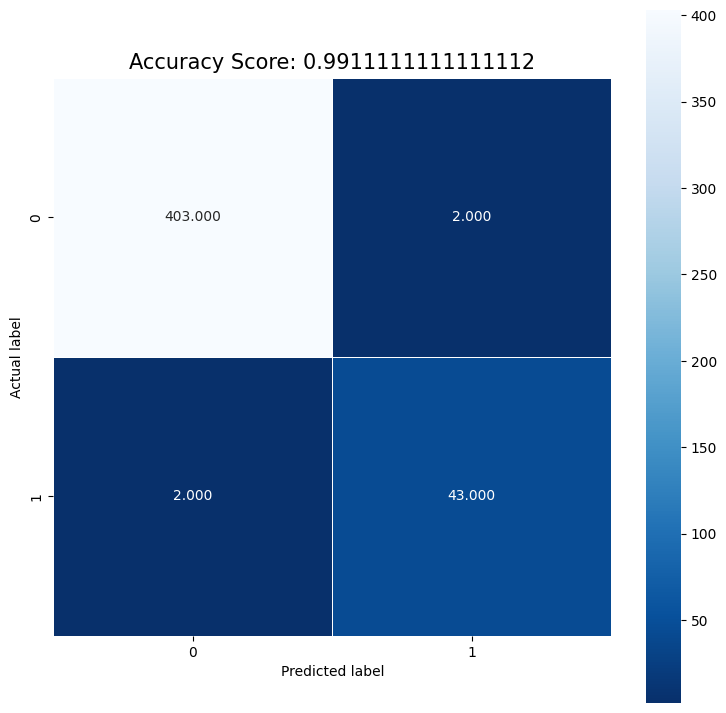

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_binary, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_4binary_prediction)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

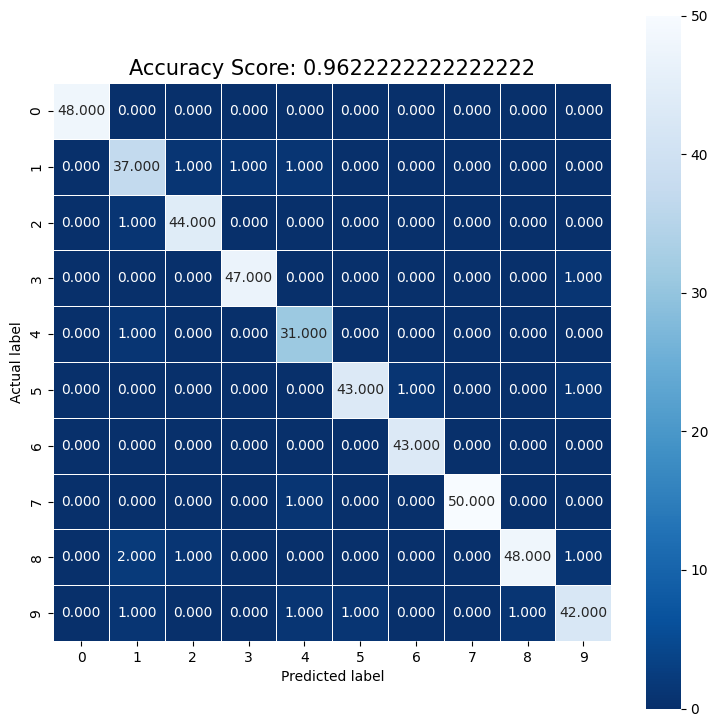

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_multi, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


[youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM)